KMEANS 聚类

In [63]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

from scipy.stats import pearsonr

import scipy.stats as stats

In [174]:
import sklearn.metrics  as sm

In [6]:
def normal_by_row(data):

    # 计算每列的均值和标准差
    mean = np.mean(data, axis=1, keepdims=True)
    std = np.std(data, axis=1, keepdims=True)

    # 标准化数据
    data_standardized = (data - mean) / mean
    return data_standardized
def normal_by_row_log(data):

    # 计算每列的均值和标准差
    mean = np.mean(data, axis=1, keepdims=True)
    std = np.std(data, axis=1, keepdims=True)

    # 标准化数据
    data_standardized = np.log10(data)
    return data_standardized

In [206]:
x_train = np.load("sh510050_train.npy")
x_train_normal = normal_by_row(x_train)
x_train_vol = np.load("sh510050_train_vol.npy")
x_train_normal_vol = normal_by_row_log(x_train_vol)/15

# choose = [ 55, 199, 288, 343, 377, 398, 411, 419, 424,426, 427,428, 429, 430, 431]
choose = [ 199, 288, 343, 398, 424, 431]
x_train_normal_sample = x_train_normal[::, choose]
x_train_normal_vol_sample = x_train_normal_vol[::, choose]
merge = np.concatenate((x_train_normal_sample, x_train_normal_vol_sample), axis=1)

In [207]:
from sklearn.cluster import KMeans

In [194]:
len(merge[6])
pred_y

array([71, 37, 71, 65,  6, 51,  6, 51, 71, 17, 17, 17, 17, 17, 52,  1, 66,
       80, 23, 66, 23, 50, 80, 23, 92, 94, 94, 31, 16, 94,  7, 25, 16, 93,
       79, 14, 96, 46, 46, 46, 48, 28, 42, 31, 54, 39, 27, 62, 90, 13, 41,
        3, 98, 98, 62, 30, 92, 94,  7, 56, 56, 61, 61, 78, 65, 51, 60, 93,
        9, 30, 30, 64, 18, 55, 10, 68, 78, 78, 78, 78, 35, 35, 69, 93, 14,
       14, 45, 52, 54, 49, 80, 81, 49,  2, 49, 94, 25, 87, 49,  2, 13, 90,
       23, 99, 95, 23,  3,  5, 77, 23,  3, 75, 24, 42, 31, 28, 28, 16,  0,
       79, 79, 14, 93, 93, 89, 46, 41, 86, 86, 84, 84, 77, 76, 87, 41,  3,
       80, 76, 49, 59, 62, 90, 49, 96,  7, 25, 25, 48, 82, 59, 69, 29, 28,
       16, 16, 16, 96,  1, 33,  5, 57, 33, 57, 57, 32, 32, 74, 19, 19, 75,
       47, 31, 31, 45, 65, 65, 37, 14,  9, 51, 93, 72, 72, 51, 37, 30, 65,
       30, 52,  2,  1, 66,  2, 23, 23, 33, 33, 83, 73, 73, 75, 67, 42, 42,
       44, 44, 49, 44, 62, 90, 48, 82, 53, 53, 79, 89,  0, 35, 36, 78, 36,
       35, 10, 69, 14, 93

In [212]:
def my_kmeans(X, k):
    kmeans = KMeans(n_clusters=k, random_state=0)
    X = merge[::2]
    kmeans.fit(X)

    # Get the cluster labels
    labels = kmeans.labels_

    # Get the cluster centers
    centers = kmeans.cluster_centers_
    pred_y = kmeans.predict(X)
    score = sm.silhouette_score(X, pred_y, sample_size=len(X), metric='euclidean')
    print(k, score)
    return centers,labels,kmeans

    

In [210]:
for k in range(10, 150, 10):
    my_kmeans(None, k)

10 0.1011706551270283
20 0.0962194101640407
30 0.09392189554635302
40 0.09453356150343073
50 0.09027530070774106
60 0.09489701495087242
70 0.0939336416917552
80 0.09168486799312295
90 0.08982983640663092
100 0.09158817962896548
110 0.09489710713137497
120 0.09515555643023732
130 0.08976204258964852
140 0.08750804138930264


In [213]:
centers,labels,kmeans = my_kmeans(None, 120)

120 0.1192125278760055


In [214]:
ks, kns = np.unique(labels, return_counts=True)

In [215]:
pct_change = np.load("sh510050_pct_change.npy")
pct_change = pct_change[::2]


In [216]:
pct_change2 = pct_change[:,3]
ran = np.array(list(range(len(pct_change))))

In [110]:
ran[labels==k]

array([ 126,  172,  269,  381,  382,  383,  384,  580,  581,  612, 1092,
       1093, 1199, 1203, 1204, 1253, 1254, 1266, 1267, 1268, 1332, 1333,
       1334, 1335, 1336, 1691, 1706, 1707, 1723, 1724, 1725, 1726, 1728,
       1949, 1951, 1952, 2174, 2175, 2181, 2182, 2192, 2234, 2235, 2243,
       2693, 2781, 2782])

In [264]:
choose = []
means = []
for k in range(120):
    mean_change = pct_change2[labels==k].mean()
    
    kclus_pct_change = pct_change2[labels==k]
    a = stats.mannwhitneyu(pct_change2, kclus_pct_change)
    if a.pvalue < 0.1:
        filter_len = len(filter_day(ran[labels==k]))
        if filter_len >4 and  abs(mean_change) > 0.003:
            print(k, filter_len, mean_change, a.pvalue)
            choose.append(k)
            means.append("{}_{}_{}".format(mean_change, filter_len, k))
#     if mean_change > 0.005 or mean_change < - 0.005:
#         print (k, kns[k], mean_change)

8 6 -0.008254043782040943 1.7648143843552275e-06
9 16 0.003664324643289307 6.294160260722629e-06
15 10 -0.0059429450494409425 4.113730191432717e-06
17 8 -0.003125601216570706 0.02071242648645322
20 14 -0.007374528484408491 3.408226050804372e-05
21 26 -0.0032288100143774852 0.03958498409039698
23 18 -0.004224899226503952 0.004531033966374248
25 26 -0.003006167057044073 0.07528248032073963
34 14 0.004328950906338863 1.3596225288899386e-05
36 11 -0.004657611760571279 0.00015748643853519124
38 13 0.0036777779816638666 0.017062450175996023
42 10 0.003083248619117062 0.0018621197329927357
43 18 0.009301016387986704 9.438943306562972e-14
48 18 -0.0031870220679445873 0.0026560159647810036
56 15 -0.003996317979224777 0.0043339488755939695
58 19 -0.004085537982955501 0.000779824321726806
61 27 -0.004160375885466669 0.00098593564626134
64 7 -0.008217310099935256 0.004500924206326642
66 7 -0.005130483880096676 0.0002979809585193951
71 5 0.005898383137999061 0.0019472000639392893
80 5 -0.0079200988

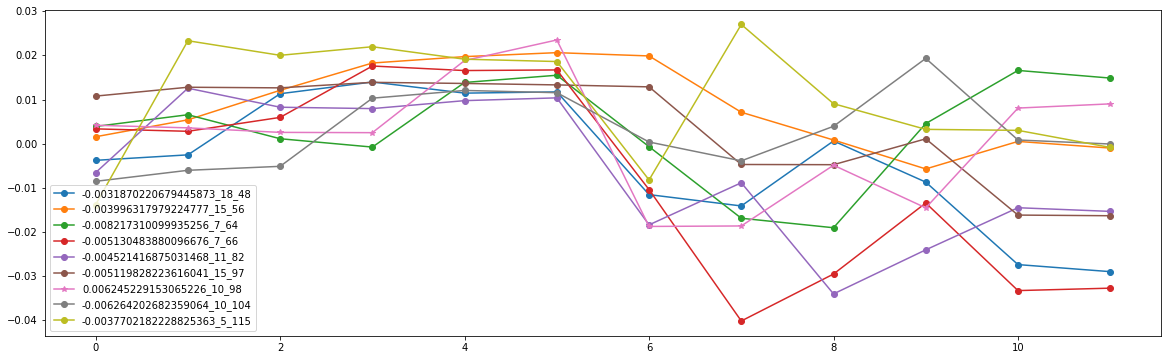

In [269]:
plt.rcParams["figure.figsize"] = (20,6)
import matplotlib.ticker as ticker
fig, ax = plt.subplots(1,1)
leg = []
for n,l in enumerate(choose):
    x = list(range(len(centers[n])))
    y = centers[l]
    me = means[n]
    mea  = float(me.split("_")[0])
    
#     print(mea)
    if mea > 0:
        marker = "*"
        if y[5] >0.010:
            ax.plot(x, y, label=me, marker = marker)
            leg.append(me)
    else:
        marker = "o"
        if y[5] >0.010:
            ax.plot(x, y, label=me, marker = marker)
            leg.append(me)
            
ax.legend(leg)


In [34]:
import matplotlib.pyplot as plt 

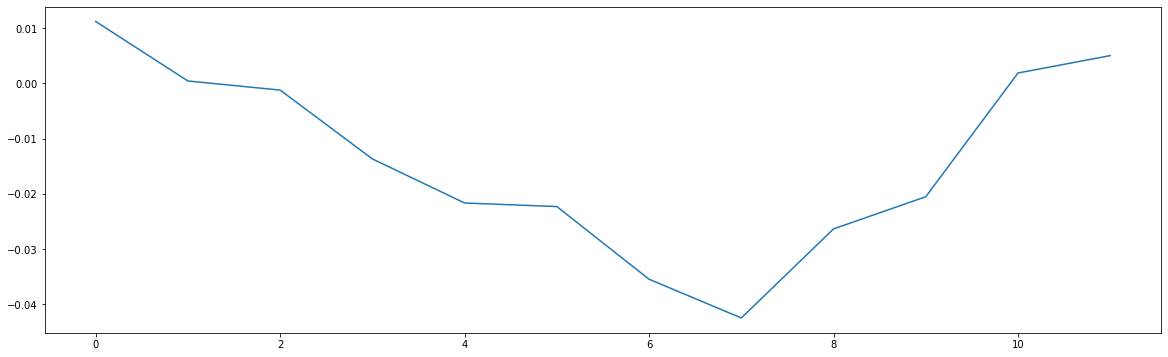

In [232]:
plt.plot(centers[76])

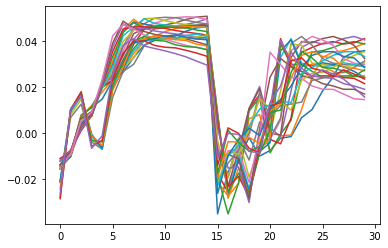

In [123]:
choose_l = X[labels==92,:]
ct = choose_l.T
plt.plot(ct)

In [40]:
pct_change[labels==37]

array([[ 0.00292101,  0.01028702,  0.00895352,  0.01981204],
       [ 0.00571501,  0.01054102,  0.00869952,  0.01955804],
       [ 0.00832962,  0.01208113,  0.00953774,  0.02047434],
       [ 0.00883493,  0.01156804,  0.00877137,  0.02002161],
       [ 0.00914576,  0.01022547,  0.00806605,  0.01911718],
       [ 0.00900672,  0.00945072,  0.00748446,  0.01731574],
       [ 0.00734456,  0.00797771,  0.00671141,  0.01487907],
       [ 0.00479859,  0.00448289,  0.00524056,  0.01111251],
       [ 0.00372052,  0.00239627,  0.00491865,  0.00926977],
       [-0.00139174, -0.01274539, -0.01120715,  0.02402578],
       [-0.0010273 , -0.01071324, -0.00931905,  0.02604931],
       [-0.00242309, -0.01042661, -0.00917835,  0.02760849],
       [-0.00418656, -0.01050312, -0.00837312,  0.02857143],
       [-0.00748239, -0.01026995, -0.00887617,  0.02941608],
       [-0.0100462 , -0.00843294, -0.00982621,  0.0306519 ],
       [-0.01136947, -0.00682168, -0.01107607,  0.03132106],
       [-0.0096959 , -0.

In [82]:
a = np.array(list(range(len(pct_change))))

In [86]:
a[labels==17]

array([  97,  101,  102,  208,  223,  224,  227,  372,  373,  374,  375,
        390,  391,  556,  814,  815,  826, 1165, 1167, 1283, 1322, 1323,
       1324, 1325, 1540, 1683, 1771, 1772, 1773, 1774, 1775, 1779, 1800,
       2161, 2533, 2534, 2535, 2536, 2537, 2538, 2555, 2556, 2562, 2568,
       2569, 2570, 2653, 2658, 2659, 2755, 2762, 2763, 2764, 2765, 2810,
       2811, 2814])

In [89]:
def filter_day(day_list):
    choose_day = []
    choose_day.append(day_list[0])
    yes = day_list[0]
    for da in day_list[1:]:
        if da - yes < 3:
            pass
        else:
            choose_day.append(da)
        yes = da
    return choose_day

In [106]:
filter_day(ran[labels==92])

[419,
 424,
 428,
 434,
 439,
 538,
 777,
 947,
 1652,
 2065,
 2510,
 2617,
 2890,
 2901,
 2912,
 2967,
 2970]